# **Práctica: Series Temporales**

* **Asignatura:** Aprendizaje Profundo
* **Máster:** Inteligencia Computacional e Internet de las Cosas
* **Estudiante:** Mabrouka Salmi
* **Fecha:** 31/03/2024

**Contenido:**
1.  Data Importing and Preparation

2.  Exploratory Data Analysis (EDA)

3.  Decomposition of Time Series

4. Testing for Stationarity
5. Autocorrelation Analysis
7. Modeling with ARMA, ARIMA, and SARIMA
8. Prediction with SARIMA
9. Conclusion

## **1. Data Importing and Prepration**

* Import some necessary libraries

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Read the dataset of `produccion-energia.csv`

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AP/produccion-energia.csv")
print(df.head())


         DATE  IPG2211A2N
0  1939-01-01      3.3842
1  1939-02-01      3.4100
2  1939-03-01      3.4875
3  1939-04-01      3.5133
4  1939-05-01      3.5133


* Check the shape of the dataset

As we see in the top 4 rows of the dataset, the given time series is univariate consists of the time refering to the month and its corresponding industrial production amount in term of electricity and gaz.

In [4]:
df.shape

(966, 2)

There are 966 time-point in the dataset each associated with a production value.

* Set the appropriate index for time series

In [6]:
df.DATE = pd.to_datetime(df.DATE)
df.set_index("DATE", inplace = True)
df.rename(columns={"IPG2211A2N":"Production"}, inplace=True) # changed the column name of the series
print(df.head())

            Production
DATE                  
1939-01-01      3.3842
1939-02-01      3.4100
1939-03-01      3.4875
1939-04-01      3.5133
1939-05-01      3.5133


We set the `DATE` to be of `datetime` data-type and to be the index of the time-series data

## **2. Exploratory Data Analysis (EDA)**

* Get summary statistics

In [7]:
# get the description of the dataset using the describe method
print(df.describe(),'\n')

# get info on the dataset features
print(df.info())

       Production
count  966.000000
mean    54.490727
std     35.381862
min      3.384200
25%     19.232950
50%     54.702650
75%     87.622375
max    128.907100 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 966 entries, 1939-01-01 to 2019-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  966 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB
None


✍ We have the tracking of the industrial production
(electricity and gaz) all along 966 months in the period from 1939-2019. The production value is of type floting point, where mean of this series is 54.70. Given that the production values are ranging from 3.38 t 128.90 units, a standard deviation of 35.38 may be relatively high.

* Visualization of the time series

Text(0.5, 0, 'Year')

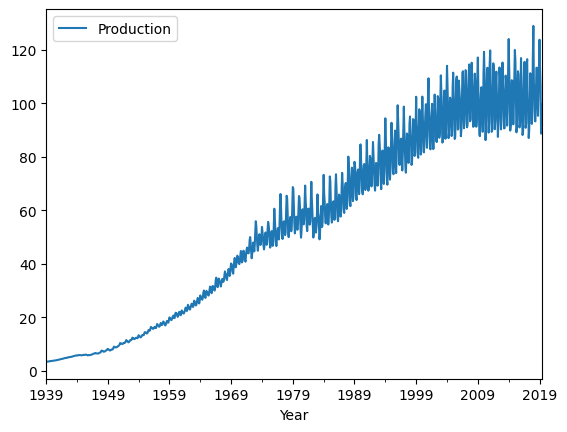

In [8]:
df.plot()
plt.xlabel("Year")

<Axes: xlabel='DATE'>

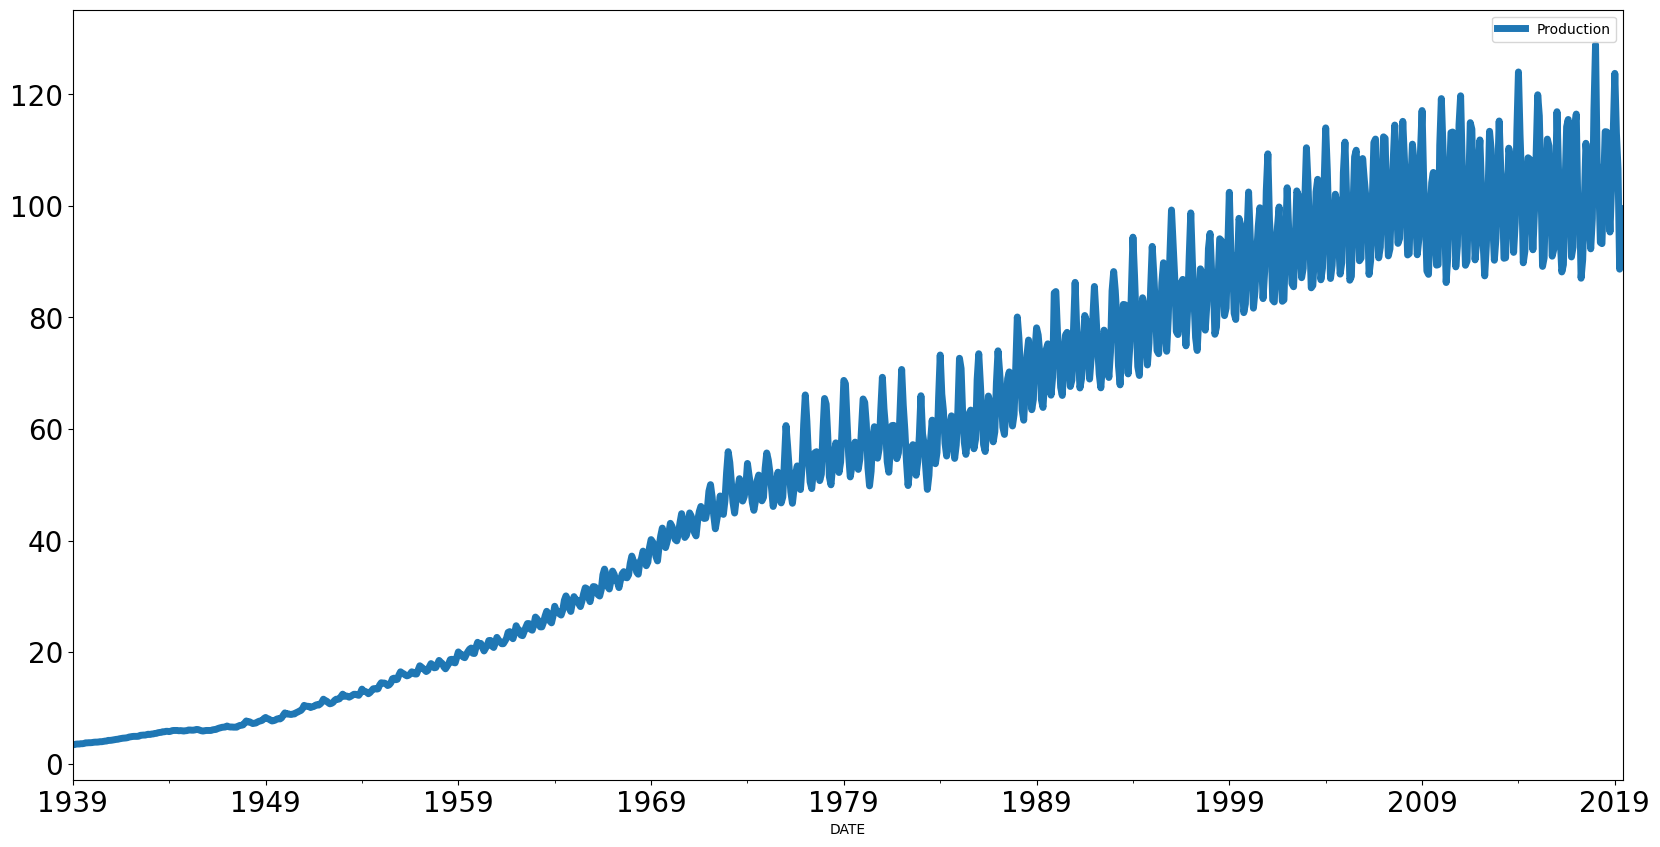

In [9]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)

There is a positive trend considerable from the graph, besides the seasonality exists in this time-series data.

* Check the seasonality presence graphically

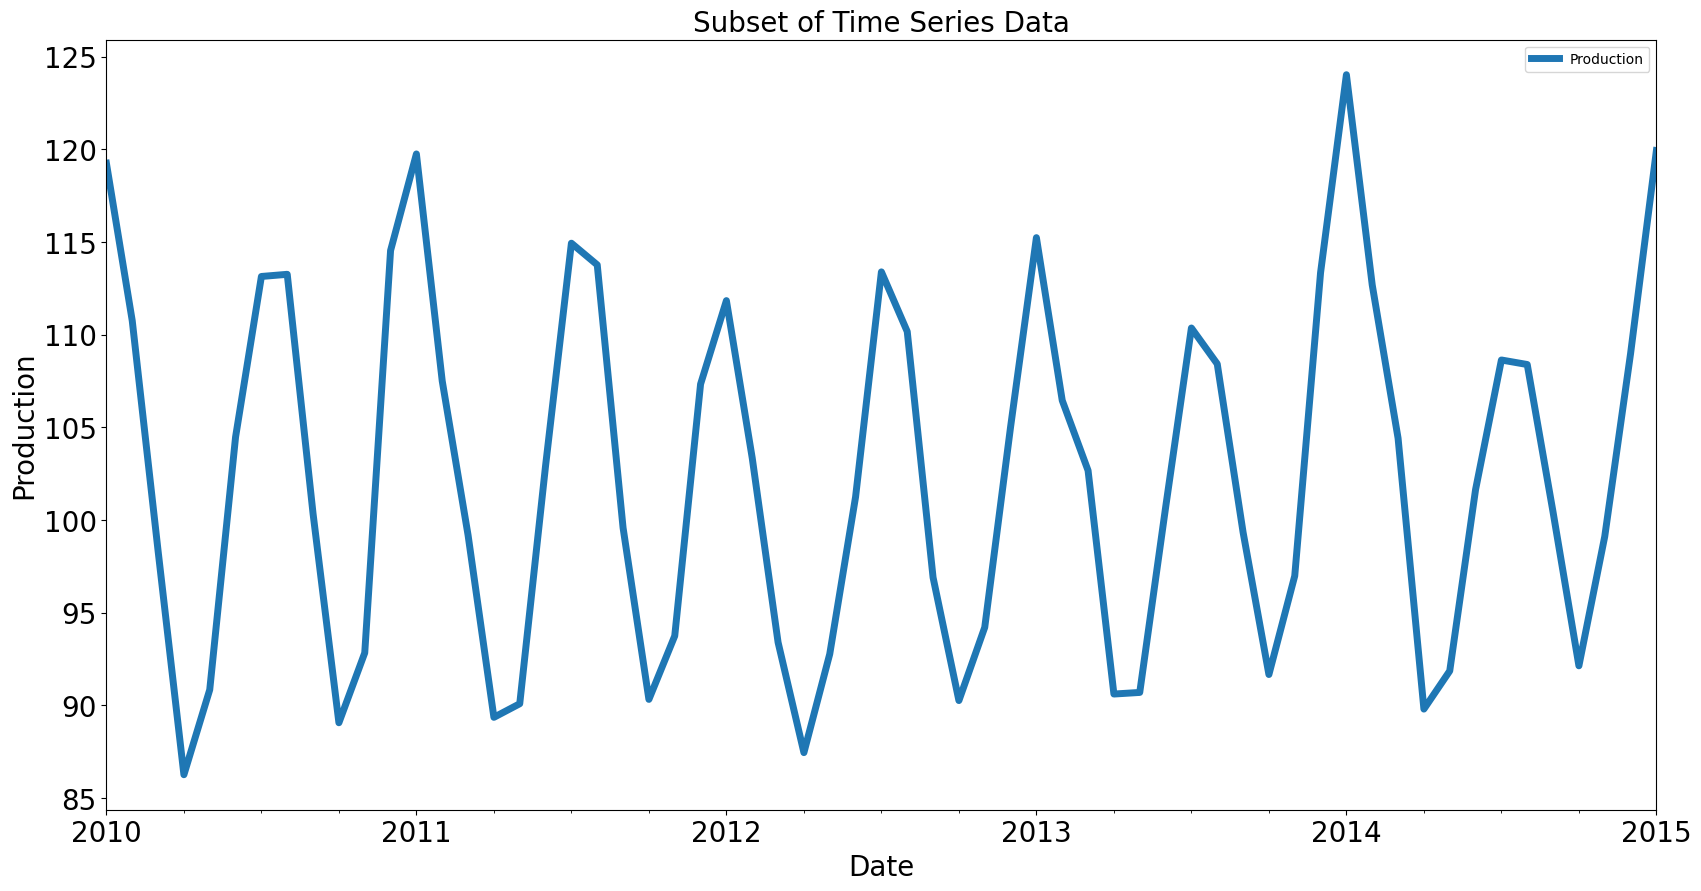

In [11]:
start_date = '2010-01-01'
end_date ='2015-01-01'

# Slice the dataframe
subset_df = df[start_date:end_date]
# Plot the subset of data
subset_df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title('Subset of Time Series Data', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Production', fontsize=20)
plt.show()

✍ From the graph of a subset of the time series, the seasonality in the data is noticable.

## **3. Decomposition of Time Series**

* Obtener la tendencia

<class 'pandas.core.resample.DatetimeIndexResampler'>
DATE
1939-12-31    3.582217
1940-12-31    3.950358
1941-12-31    4.456242
1942-12-31    5.005225
1943-12-31    5.530525
Freq: A-DEC, Name: Production, dtype: float64 

DATE
1939-01-01         NaN
1939-02-01         NaN
1939-03-01         NaN
1939-04-01         NaN
1939-05-01         NaN
1939-06-01         NaN
1939-07-01         NaN
1939-08-01         NaN
1939-09-01         NaN
1939-10-01         NaN
1939-11-01         NaN
1939-12-01    3.582217
1940-01-01    3.614508
1940-02-01    3.648950
1940-03-01    3.679092
1940-04-01    3.707083
1940-05-01    3.737225
1940-06-01    3.767367
1940-07-01    3.797508
1940-08-01    3.827642
Name: Production, dtype: float64


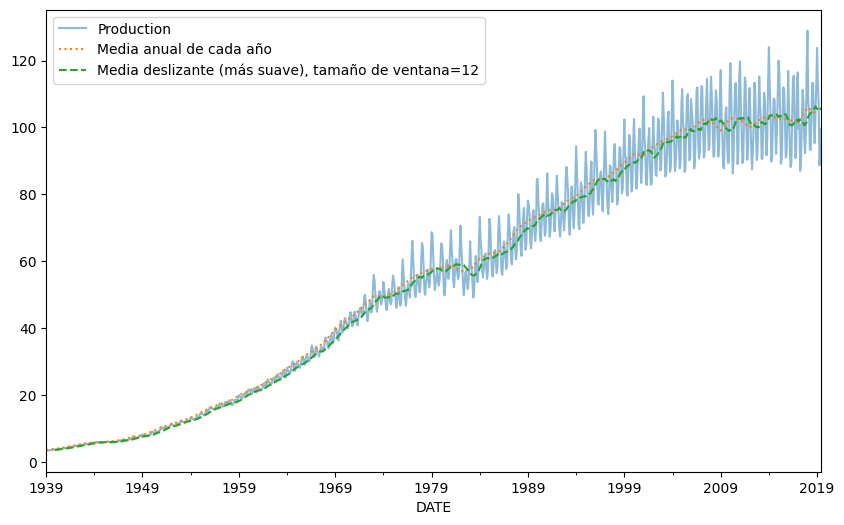

In [12]:
# metodo 1
import matplotlib.pyplot as plt

production = df['Production']
# get the annual mean of the data and store it in `prod_resamp_yr`
print(type(production.resample('A')))
prod_resamp_yr = production.resample('A').mean()
print(prod_resamp_yr.head(),'\n')

# get the moving average of the `production`
prod_roll_yr = production.rolling(12).mean() # la moyenne mobile
print(prod_roll_yr.head(20))

# plotting the data
plt.figure(figsize=(10, 6))
ax = production.plot(alpha=0.5, style='-') # Guardamos los ejes (ax) para reutilizarlos en el resto de plots
prod_resamp_yr.plot(style=':', label='Media anual de cada año', ax=ax)
prod_roll_yr.plot(style='--', label='Media deslizante (más suave), tamaño de ventana=12', ax=ax)
ax.legend()
plt.show()

✍ We see the positive trend of the production over time, besides the moving average of the production tends to mimic the fluctuation in the time-series better than the annual mean

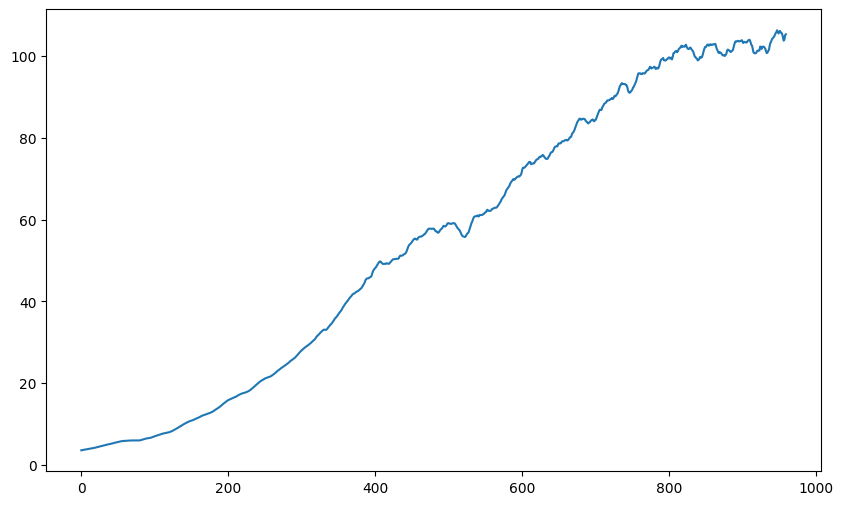

In [14]:
# método 2

x = np.asarray(df[['Production']])
win = 12
win_half = int(win/2)

prod_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
plt.figure(figsize=(10, 6))

plt.plot(prod_smooth)
plt.show()

This plot shows a smoothed version of the time series and clearly demonstrate the trend to increase.

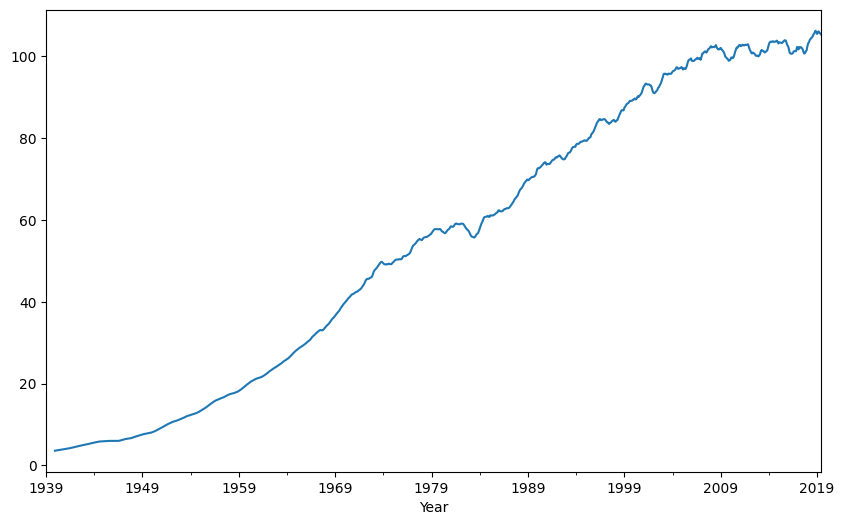

In [15]:
production = df['Production']

df_avg = production.rolling(12).mean(12)
plt.figure(figsize=(10, 6))
df_avg.plot()
plt.xlabel('Year')
plt.show()

✍ This plot is for the moving average of the time series confirming the presence of a positive trend.

* Removing the trend from the time series

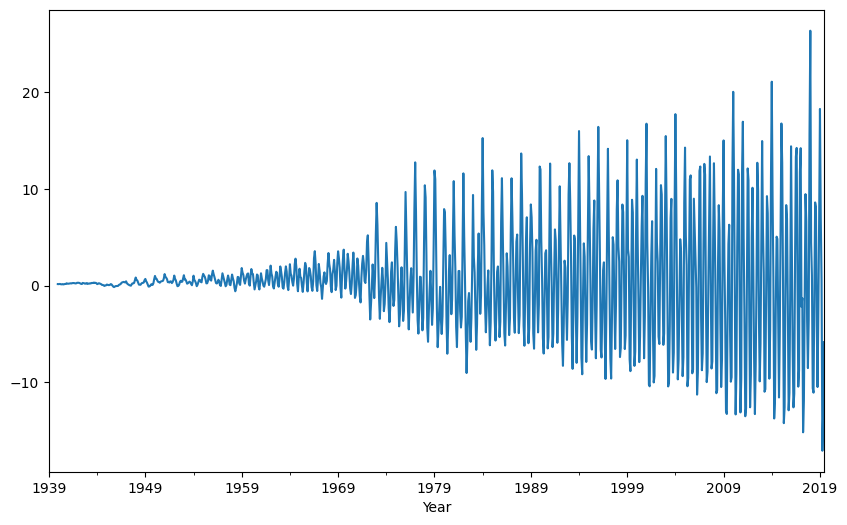

In [17]:
df_dtrend = df['Production'] - df_avg
plt.figure(figsize=(10, 6))
df_dtrend.plot()
plt.xlabel('Year')
plt.show()

✍ The detrenced time series is claculated by subtracting the average (trend) from the original data. It shows the short-term variations in the data

* Seasonality patterns

DATE
1939-01-01    3.3842
1939-02-01    3.4100
1939-03-01    3.4875
1939-04-01    3.5133
1939-05-01    3.5133
Name: Production, dtype: float64 

DATE
1939-01-01       NaN
1939-02-01    3.3842
1939-03-01    3.4100
1939-04-01    3.4875
1939-05-01    3.5133
Name: Production, dtype: float64
DATE
1939-01-01       NaN
1939-02-01    0.0258
1939-03-01    0.0775
1939-04-01    0.0258
1939-05-01    0.0000
Name: Production, dtype: float64


<Figure size 1000x600 with 0 Axes>

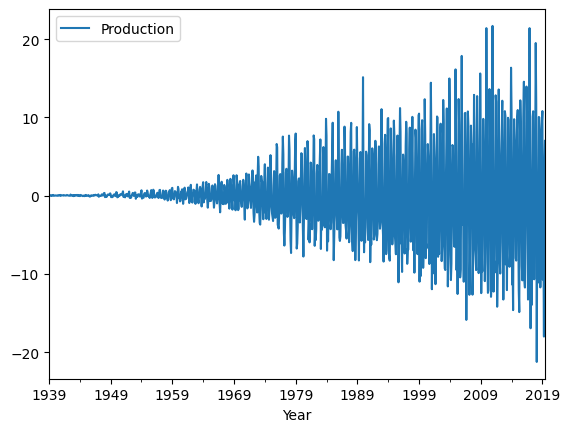

In [16]:
print(production.head(),'\n')
print(production.shift().head())
print(production.diff().head())
assert np.all((production.diff() == production - production.shift())[1:])

plt.figure(figsize=(10, 6))
df.diff().plot()
plt.xlabel('Year')
plt.show()

Even in the differeced data the fluctiations are increasign over time in magnitude.

* Periodicity y correlation

Text(0.5, 0, 'Year')

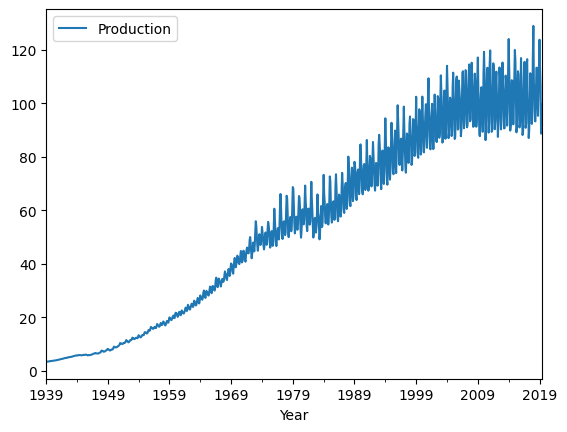

In [21]:
df.plot()
plt.xlabel('Year')

Text(0.5, 0, 'Year')

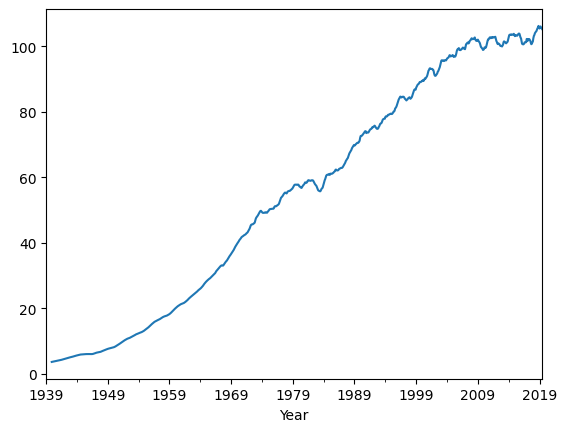

In [20]:
df_avg.plot()
plt.xlabel('Year')

Text(0.5, 0, 'Year')

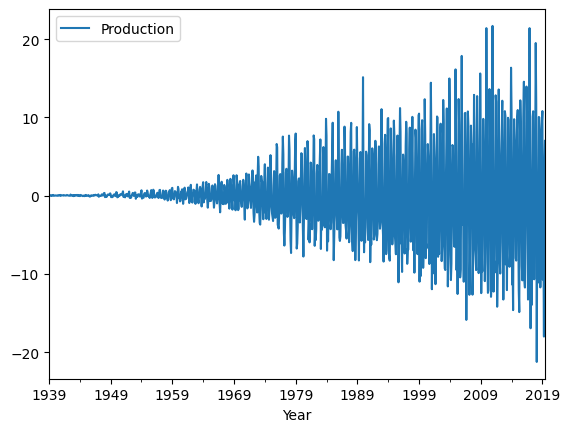

In [19]:
df.diff().plot()
plt.xlabel('Year')

✍ We notice that the magnitude of the seasonality increases with the level of the time series, for that we can conclude that the trend and the seasonal components are multiplied together to get the observed data. Hence, the multiplicative decomposition model better suits the time series data at hand based on the nature of the seasonality and the trend.

### **Decomposition of Time series with `seasonal_decompose`**

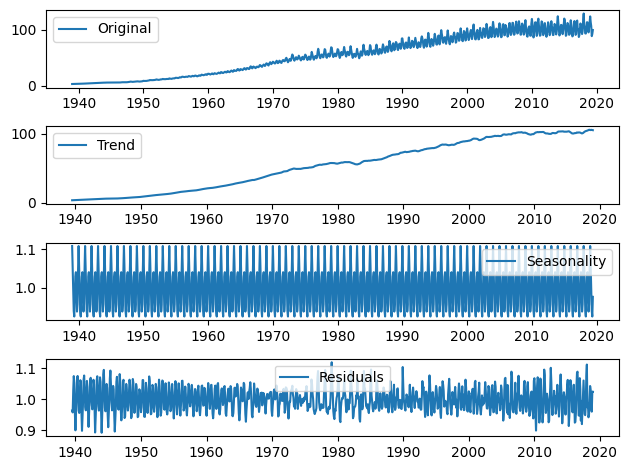

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = production

x = x.astype(float)
decomposition = seasonal_decompose(x, model ="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

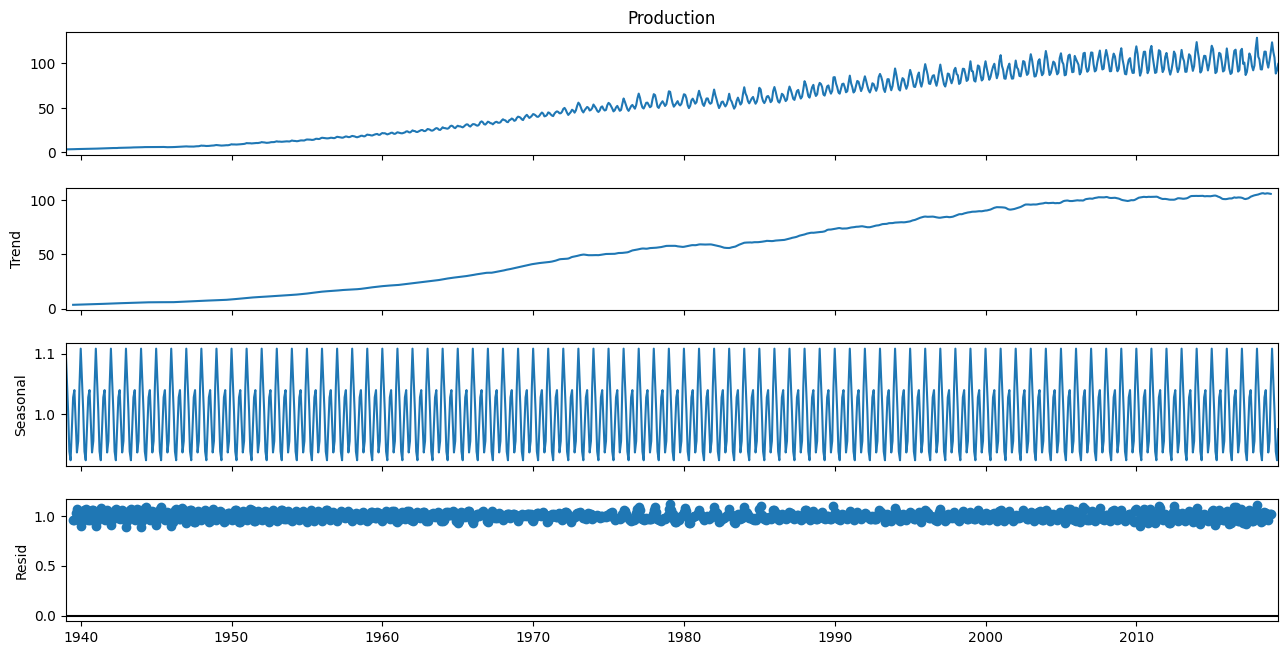

In [22]:
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

✍ The plots of the time series component conform with conclusions from the visualizations before. The trend is positive, the seasonal component is showing a repetitive pattern, and the residual explains fluctuation obtained in the differenced data

## **4. Testing for Stationarity**

Comprobar la estacionariedad

In [ ]:
### Representar los estadísticos para comprobar la estacionariedad
def test_stationarity(timeseries, title):

    # Determinar los estadísticos
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='media deslizante');
    ax.plot(rolstd, label='desviación típica deslizante (x10)');
    ax.legend()

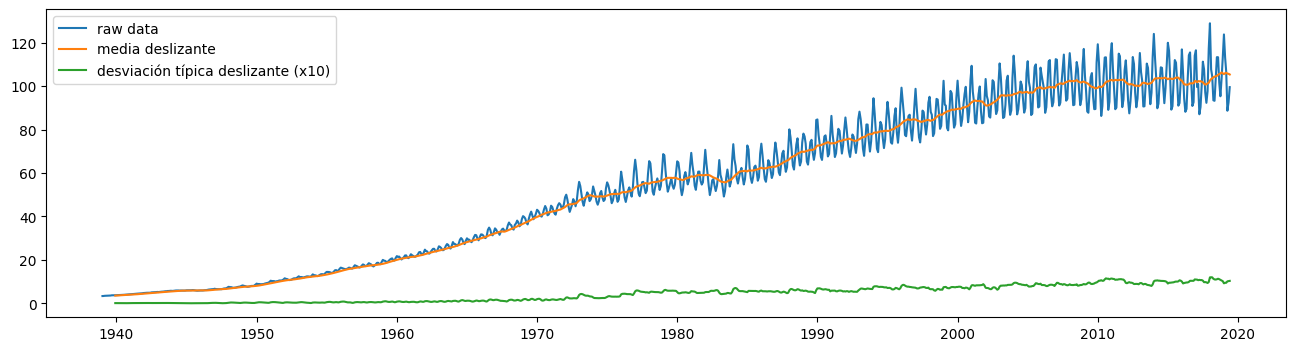

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(production,'raw data')

✍ We notice a slight change in the variance, mainly starting from the year 1973 which we can see graphically. We should then rely on statisitical test to test if this variation is significant.

* The Autocorrelation Function (ACF) test to check the stationarity of the production time series.

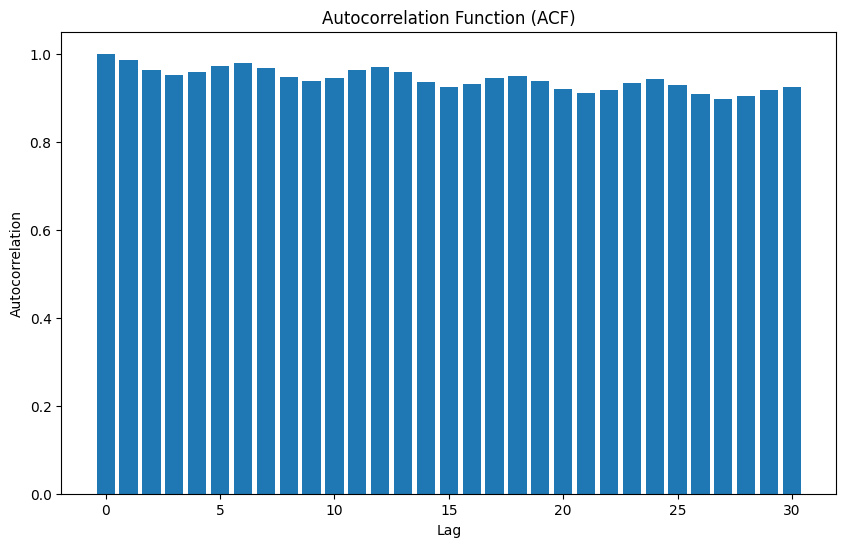

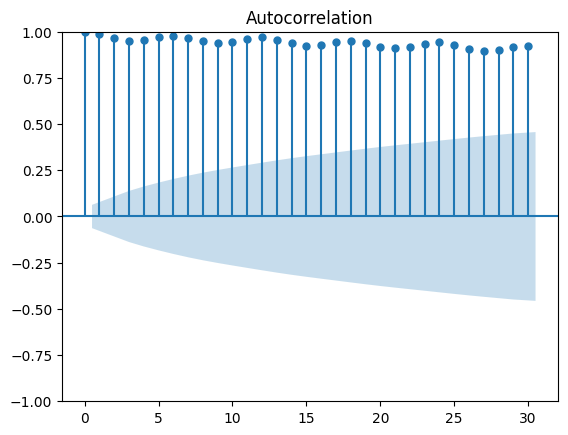

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
# Calculate the autocorrelation function (ACF)
lags = 30  # number of lags to include in the autocorrelation function
acf_result = acf(df, nlags=lags)

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.bar(range(lags+1), acf_result)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Alternatively, you can directly use the plot_acf function from statsmodels
plot_acf(df, lags=lags)
plt.show()

✍ The values of the autocorrelation is between `[0.85, 1]` stating significant autocorrelation all along the lags which indicate the presence of non-stationary patterns in the data

* Test estadístico Augmented Dickey-Fuller (ADF)

In [ ]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > ¿Es estacionaria la serie {}?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Estadístico = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Valores críticos :')
    for k, v in dftest[4].items():
        print('\t{}: {} - La serie es {} estacionaria con una confianza de {}%'.format(k, v, 'no' if v<dftest[0] else '', 100-int(k[:-1])))

In [ ]:
ADF_test(production, 'Datos originales')

 > ¿Es estacionaria la serie Datos originales?
Estadístico = -0.414
P-value = 0.908
Valores críticos :
	1%: -3.437303541847512 - La serie es no estacionaria con una confianza de 99%
	5%: -2.864609814371715 - La serie es no estacionaria con una confianza de 95%
	10%: -2.5684045480287296 - La serie es no estacionaria con una confianza de 90%


✍ The results of the Augmented Dicke-Fuller test the production time series confirms its non-stationarity

* Handling the non-stationairity

 > ¿Es estacionaria la serie datos sin tendencia?
Estadístico = -2.294
P-value = 0.174
Valores críticos :
	1%: -3.437385839245221 - La serie es no estacionaria con una confianza de 99%
	5%: -2.8646461040926496 - La serie es no estacionaria con una confianza de 95%
	10%: -2.5684238776271435 - La serie es no estacionaria con una confianza de 90%


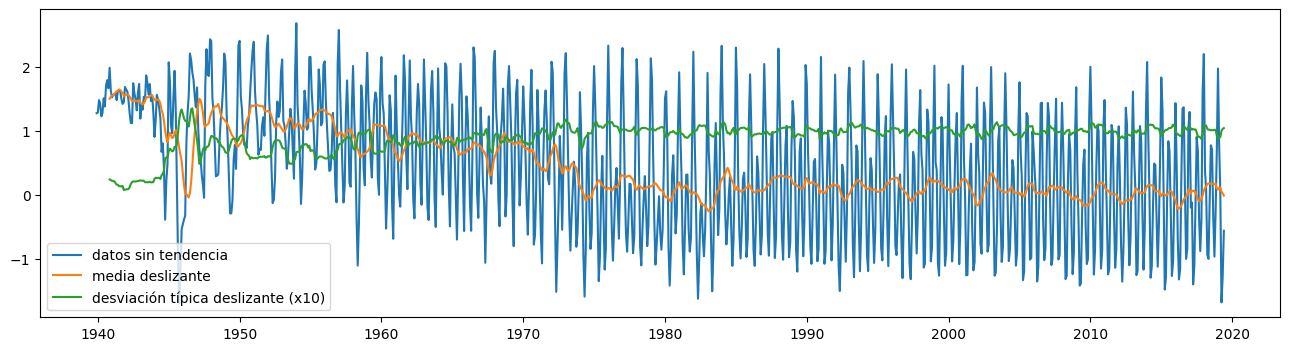

In [ ]:
# Eliminar tendencia
production_detrend = (production - production.rolling(window=12).mean())/production.rolling(window=12).std()
test_stationarity(production_detrend,'datos sin tendencia')
ADF_test(production_detrend,'datos sin tendencia')

✍ The production time series even without trend is still non-stationary, for that we are going to eliminate the seasonality and check the stationarity of the time series



 > ¿Es estacionaria la serie datos con retardo de 12 instantes?
Estadístico = -6.461
P-value = 0.000
Valores críticos :
	1%: -3.437393417528114 - La serie es  estacionaria con una confianza de 99%
	5%: -2.864649445749773 - La serie es  estacionaria con una confianza de 95%
	10%: -2.5684256575572735 - La serie es  estacionaria con una confianza de 90%


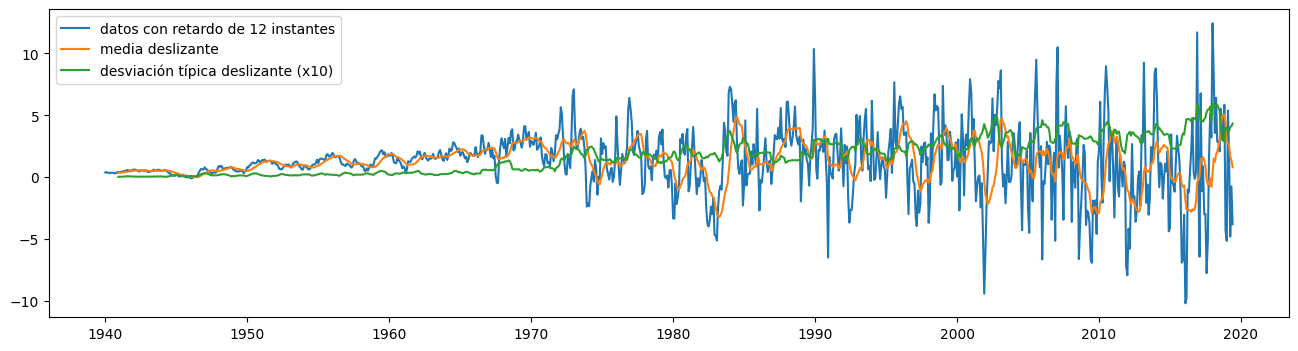

In [ ]:
# Differencing
production_12lag = production - production.shift(12) # fromt the visualization of the seasonality cmponent we can see the yearly pics

test_stationarity(production_12lag, 'datos con retardo de 12 instantes')
ADF_test(production_12lag, 'datos con retardo de 12 instantes')

The ADF test shows that the production time series with a difference of 12 lags is significantly stationary with p-value almost 0. Hence, differencing the time series effectively treated the non-stationarity in this case.

## **5. Autocorrelation Analysis**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

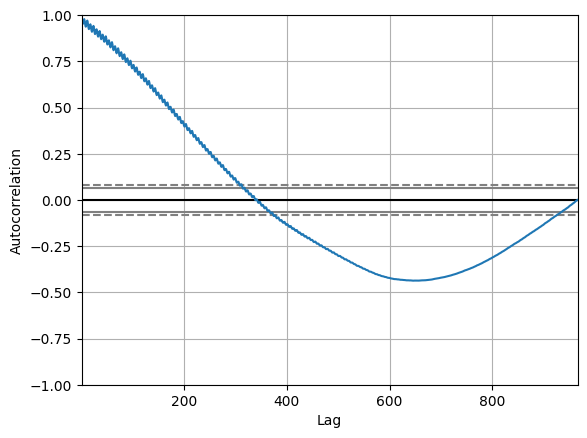

In [ ]:
from pandas.plotting import autocorrelation_plot

x = production.astype(float)
autocorrelation_plot(x)

✍ The autocorrelation plot shows how it was significantly high at the begining of about more than 200 lags and drops off, then it shows a significant negative autocorrelation values.

Text(0.5, 1.0, 'Autocorrelation Function')

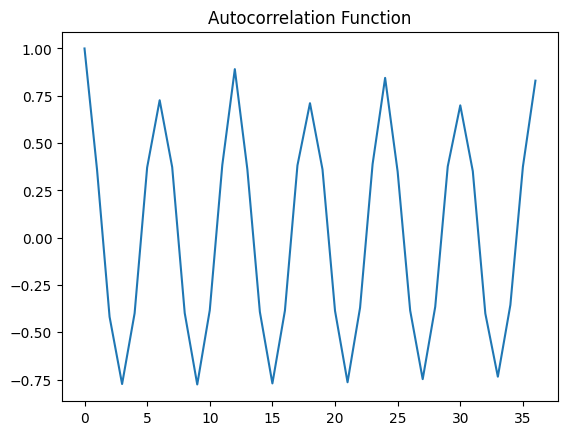

In [ ]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # El primer término será NA
lag_acf = acf(x_diff, nlags=36, fft=True)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

✍ We can clearly see three pics during each 12 months in the the ACF plot of the differenced data which wasn't clear in the autocorrelation plot of the original data above.

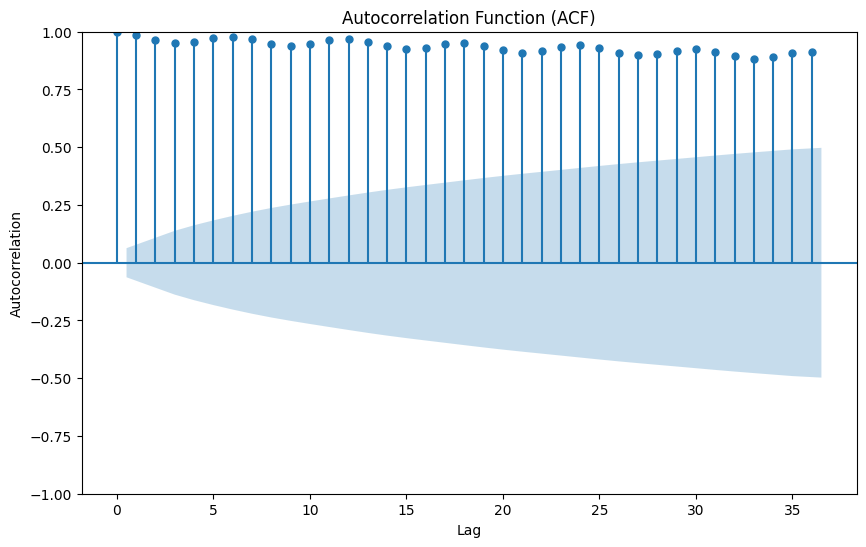

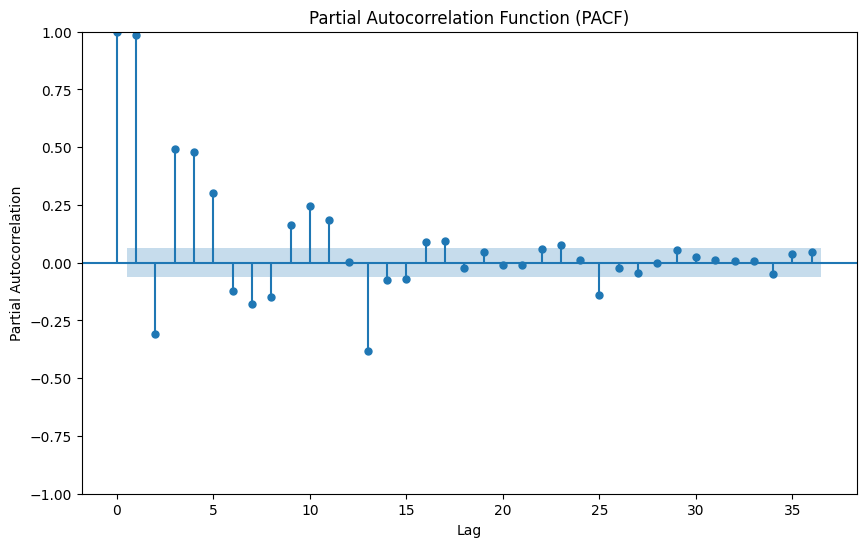

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Calculate and plot autocorrelation function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(production, lags=36, ax=plt.gca())  # Adjust lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Calculate and plot partial autocorrelation function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(production, lags=36, ax=plt.gca())  # Adjust lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

✍ The autocorrelation indicates the presence of both trend ans seasonality. The autocorrelation is slowly decreasing (trend) and at the same time those lags multiples of the seasonal frequency have larger autocorrelation than other lags. The pattern is repeated each 6 months in the autocorrelation plot. In the patial autocorrelation plot of the production time series, we notice a drop-off in the values of `PACF`, the two first values are significant then there few other lower values and then non significant values at some lags and so on, such fluctuation in the `pacf` values indicate that the time series is not a random walk.

## **6. Modeling with ARM, ARIMA, and SARIMA**

* Train-test-split of time series data

In [24]:
predict_date='2016-01-01'
production_to_train = production[:predict_date] # Datos de entrenamiento (todos los años salvo los dos últimos)
production_to_test = production[predict_date:] # Dos últimos años para test
predict_length = len(production) - len(production[:predict_date]) # Número de datos en test

### Metodo estacional de Holt-Winters

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_length):

    y.plot(marker='o', color='black', legend=True, figsize=(17, 7))

    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', use_boxcox=True).fit()
        fcast1 = fit1.forecast(predict_length).rename('Aditiva')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('Error cuadrático medio de una tendencia aditiva, estacionalidad aditiva con '+
              'un periodo season_length={} y una transformación Box-Cox {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))

        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True, use_boxcox=True).fit()
        fcast2 = fit2.forecast(predict_length).rename('Aditiva amortiguada')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('Error cuadrático medio de una tendencia aditiva amortiguada, estacionalidad aditiva con '+
              'un periodo season_length={} y una transformación Box-Cox {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))

        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)

    elif seasonal_type == 'multiplicative':
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', use_boxcox=True).fit()
        fcast3 = fit3.forecast(predict_length).rename('Multiplicativa')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('Error cuadrático medio de una tendencia aditiva, estacionalidad multiplicativa con '+
              'un periodo season_length={} y una transformación Box-Cox {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))

        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True, use_boxcox=True).fit()
        fcast4 = fit4.forecast(predict_length).rename('Multiplicativa amortiguada')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('Error cuadrático medio de una tendencia aditiva amortiguada, estacionalidad multiplicativa con '+
              'un periodo season_length={} y una transformación Box-Cox {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))

        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)

    else:
        print('Tipo estacional inválido. Escoger entre \'additive\' o \'multiplicative\'')

    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error cuadrático medio de una tendencia aditiva, estacionalidad multiplicativa con un periodo season_length=12 y una transformación Box-Cox 3.9


<ipython-input-85-8541705794d1>:32: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True, use_boxcox=True).fit()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error cuadrático medio de una tendencia aditiva amortiguada, estacionalidad multiplicativa con un periodo season_length=12 y una transformación Box-Cox 3.9


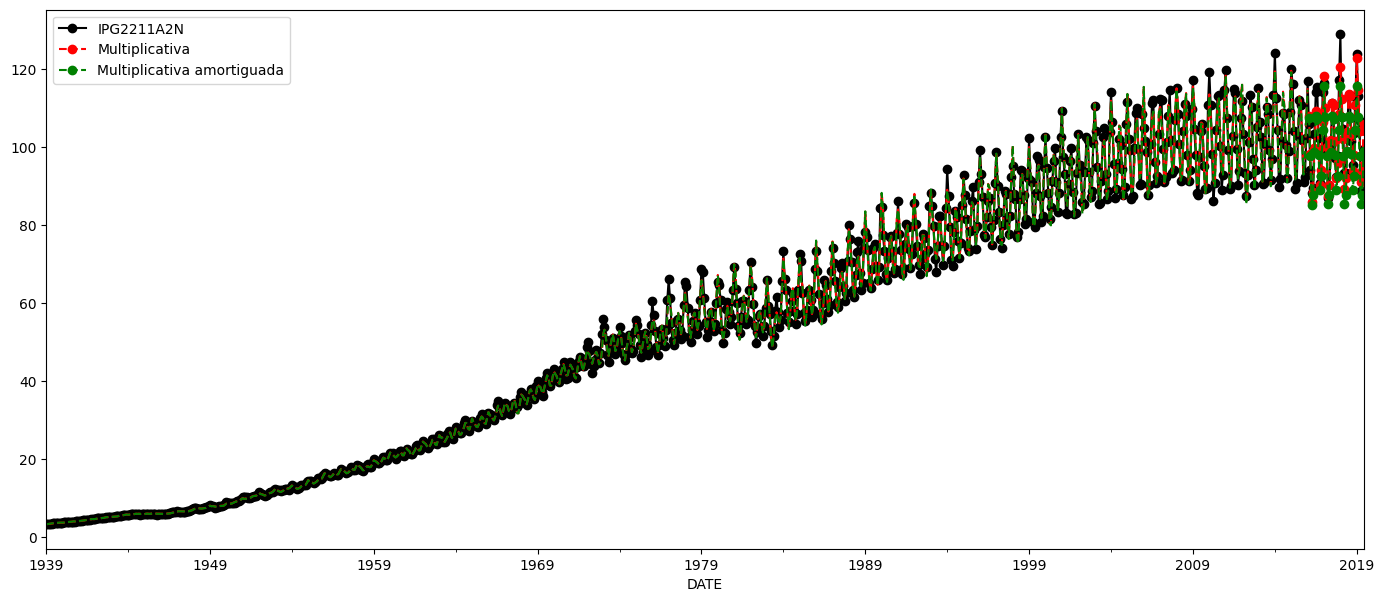

In [ ]:
holt_win_sea(production, production_to_train,production_to_test,'multiplicative',12, predict_length)

### ARMA

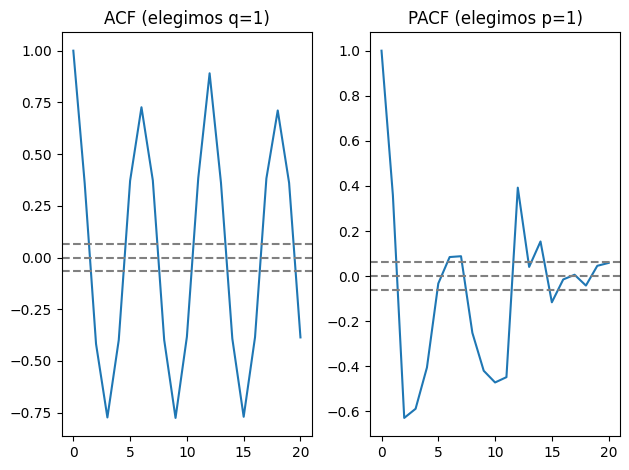

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

x = production.astype(float)

x_diff = x.diff().dropna() # El primer término será NA

# Valores ACF y PACF:
lag_acf = acf(x_diff, nlags=20, fft=True) # q
lag_pacf = pacf(x_diff, nlags=20, method='ols')# p

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('ACF (elegimos q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('PACF (elegimos p=1)')
plt.tight_layout()

 We select the `p`, `q` associated with the order in which the plot drops off or changes from positive to negative, respectively, the `ACF` plot and the `PACF` plot.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  966
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2873.056
Date:                Sun, 31 Mar 2024   AIC                           5754.112
Time:                        09:45:30   BIC                           5773.605
Sample:                    01-01-1939   HQIC                          5761.533
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.4891     16.193      3.365      0.001      22.751      86.228
ar.L1          0.9793      0.009    112.813      0.000       0.962       0.996
ma.L1          0.5518      0.018     30.078      0.0

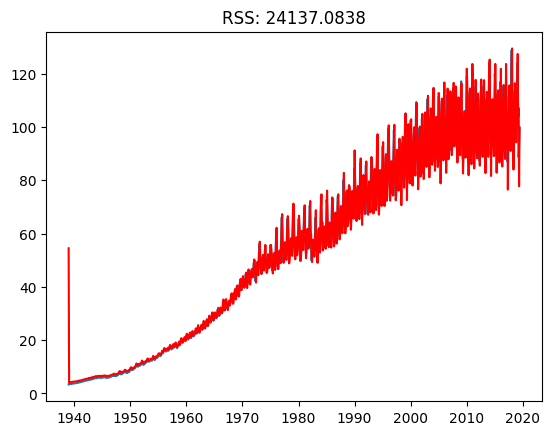

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo más general Seasonal ARIMA multiplicativo SARIMAX(p,d,q)x(P,D,Q,s)
# order=(p,d,q) seasonal_order(P,D,Q,s)
model = ARIMA(x, order=(1, 0, 1), seasonal_order=(0,0,0,0)).fit() # fit model

print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))

✍

We fitted an ARIMA(1, 0, 1) model to the data, `(p, d, q)=(1, 0, 1)` indicates the one autoregressive term (AR(1)) and the one moving average term (MA(1)) without differencing.

**Log Likelihood and Information Criteria will be used to compare the ARMA with other models later:**

* The `log likelihood` of the model is -2873.056.
* The Akaike Information Criterion (`AIC`) is 5754.112.
* The Bayesian Information Criterion (`BIC`) is 5773.605.
* The Hannan-Quinn Information Criterion (`HQIC`) is 5761.533.

**Coefficients:**

* The constant term (`const`) is 54.4891, with a standard error of 16.193. It is statistically significant (p-value < 0.05).
* The coefficient for the autoregressive term (`ar.L1`) is 0.9793, indicating a strong positive relationship with the previous observation. It is highly significant (p-value < 0.05).
* The coefficient for the moving average term (`ma.L1`) is 0.5518, indicating a positive relationship with the previous error term. It is highly significant (p-value < 0.05).
* The variance of the residuals (`sigma2`) is 22.3288.


Overall, the `ARIMA(1, 0, 1)` model suggests a strong autoregressive effect and a moderate moving average effect. The model includes a significant constant term. The residuals may exhibit non-normality (according to the Jarque-Bera test for normality) and potential heteroskedasticity (heteroskedasticity in the residuals), indicating areas for further investigation and model refinement.

### ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  966
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2872.258
Date:                Sun, 31 Mar 2024   AIC                           5750.515
Time:                        09:49:59   BIC                           5765.132
Sample:                    01-01-1939   HQIC                          5756.080
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0554      0.042      1.308      0.191      -0.028       0.138
ma.L1          0.5151      0.032     15.860      0.000       0.451       0.579
sigma2        22.5246      0.663     33.965      0.0

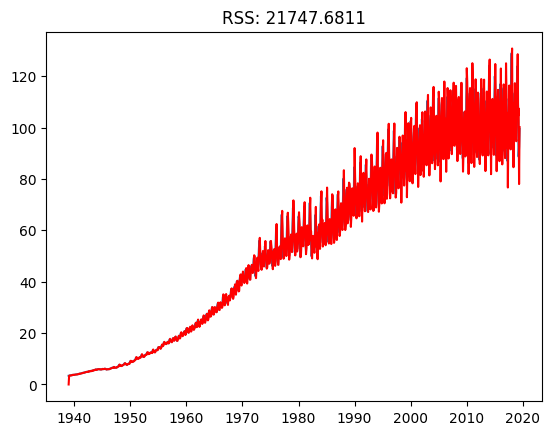

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo más general Seasonal ARIMA multiplicativo SARIMAX(p,d,q)x(P,D,Q,s)
# order=(p,d,q) seasonal_order(P,D,Q,s)
model = ARIMA(x, order=(1, 1, 1), seasonal_order=(0,0,0,0)).fit() # fit model

print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2));

✍

We fitted an ARIMA(1, 1, 1) model to the data, `(p, d, q)=(1, 1, 1)` indicating one autoregressive term, one differencing term, and one moving average term.

**Log Likelihood and Information Criteria:**

* The log likelihood of the model is -2872.258.
* The Akaike Information Criterion (AIC) is 5750.515.
* The Bayesian Information Criterion (BIC) is 5765.132.
* The Hannan-Quinn Information Criterion (HQIC) is 5756.080.

**Coefficients:**

* The coefficient for the autoregressive term (ar.L1) is 0.0554, which is not statistically significant (p-value > 0.05).
* The coefficient for the moving average term (ma.L1) is 0.5151, which is statistically significant (p-value < 0.05).
* The variance of the residuals (sigma2) is 22.5246.
Diagnostic Tests:

The models ARIMA(1,1,1) and ARMA(1,1) are showing similar performance in production forecasting. The ARIMA has slightly higher value of the `log-likelihood` idicating it is a better fit to the data. Besides the ARIMA has lower values of `AIC` and `BIC` indicating it is a better model for the production data. Moreover, the ARIMA has lower `HQIC` similarly with this metric the lower the better the model. Therefore, the ARIMA seems to be slightly better fitted the production data than the ARMA model.

### SARIMA

In [27]:
import itertools
import statsmodels.api as sm
import warnings

# Ignoramos los warnings
warnings.filterwarnings("ignore")

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]

    mini = float('+inf')


    for param in pdq:
        for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=False)

                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                print(param)
                print(param_seasonal)
                continue
    print('El conjunto de parámetros con mínimo AIC es: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [ ]:
sarima_grid_search(production_to_train,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:10272.970701877244
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:8968.507338237472
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:4410.815554225364
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:4365.1538890077845
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:4264.520889319525
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:4241.01239412132
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:4368.57540411025
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:4182.1578554493035
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:9047.642215386557
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:7824.950619693398
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:3939.9401553192974
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:3891.796974187894
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:3861.8675367430415
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:3796.174655072907
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:3897.4936513389343
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:3892.0541903606213
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:5639.289663756845
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:4871.179352551495
SARIMA(0, 1, 0)x(0, 1, 

`SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:3431.1462793023156` is the one with the least value of AIC, meaning it is the best fit to the data among the models with the combinations above.

## **7. Prediction with SARIMA(1, 1, 1)(0, 1, 1, 12)**

In [25]:
# Llamar a esta función después de obtener la mejor combinación de parámetros en función del AIC
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # Entrenar el modelo
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1],'\n')
    print(results.summary())

    results.plot_diagnostics(figsize=(16, 8))
    plt.show()

    # El argumento dynamic=False asegura que realizamos predicciones a un instante de tiempo,
    # de manera que para cada punto usamos todas las observaciones disponibles hasta ese punto.
    # Con dynamic=Fecha las predicciones de la fase de test se construyen en base a las propias
    # predicciones del modelo (no en base a los valores observados)
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('El RMSE de un modelo SARIMA con season_length={} y dynamic = False es {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observado')
    y_forecasted.plot(ax=ax, label='Predicciones en base a valores observados', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Fecha')
    ax.set_ylabel('Trend')
    plt.legend()
    plt.show()

    # Una mejor idea de la capacidad predictiva puede obtenerse usando predicciones dinámicas.
    # En este caso solo usamos las observaciones hasta un determinado instante temporal y
    # después las predicciones se generan a partir de predicciones pasadas.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('El RMSE de un modelo SARIMA con season_length={} y dynamic = True es {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observado')
    y_forecasted_dynamic.plot(label='Predicción dinámica', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Fecha')
    ax.set_ylabel('Trend')

    plt.legend()
    plt.show()

    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5463      0.022     25.003      0.000       0.504       0.589
ma.L1         -0.9409      0.011    -83.343      0.000      -0.963      -0.919
ma.S.L12      -0.6954      0.016    -42.154      0.000      -0.728      -0.663
sigma2         3.1825      0.085     37.523      0.000       3.016       3.349

                                     SARIMAX Results                                      
Dep. Variable:                         Production   No. Observations:                  966
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1877.956
Date:                            Sun, 31 Mar 2024   AIC                           3763.913
Time:                                    16:02:07   BIC                           3783.292
Sample:                                01-01-1939   HQIC              

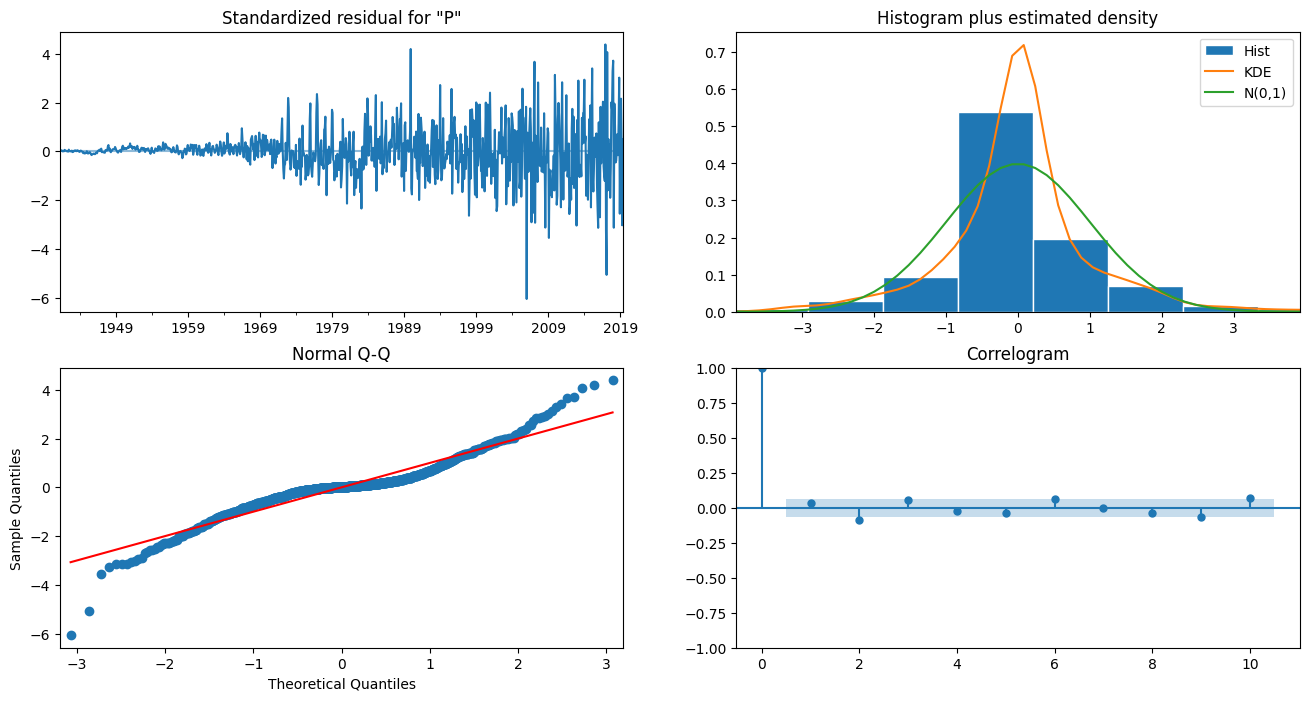

El RMSE de un modelo SARIMA con season_length=52 y dynamic = False es 3.83


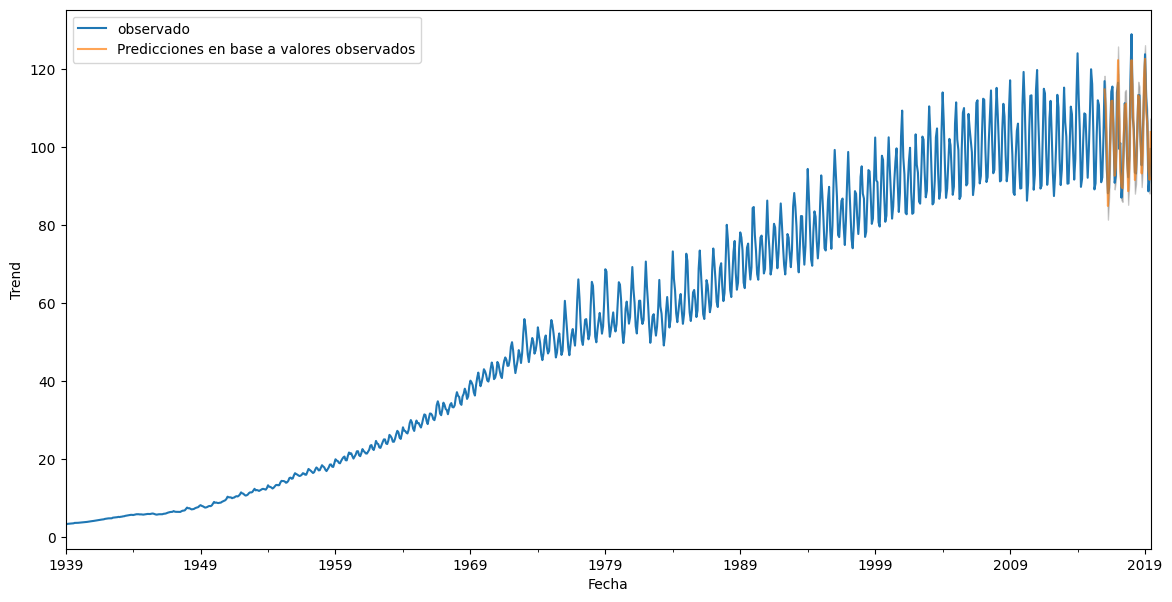

El RMSE de un modelo SARIMA con season_length=52 y dynamic = True es 4.24


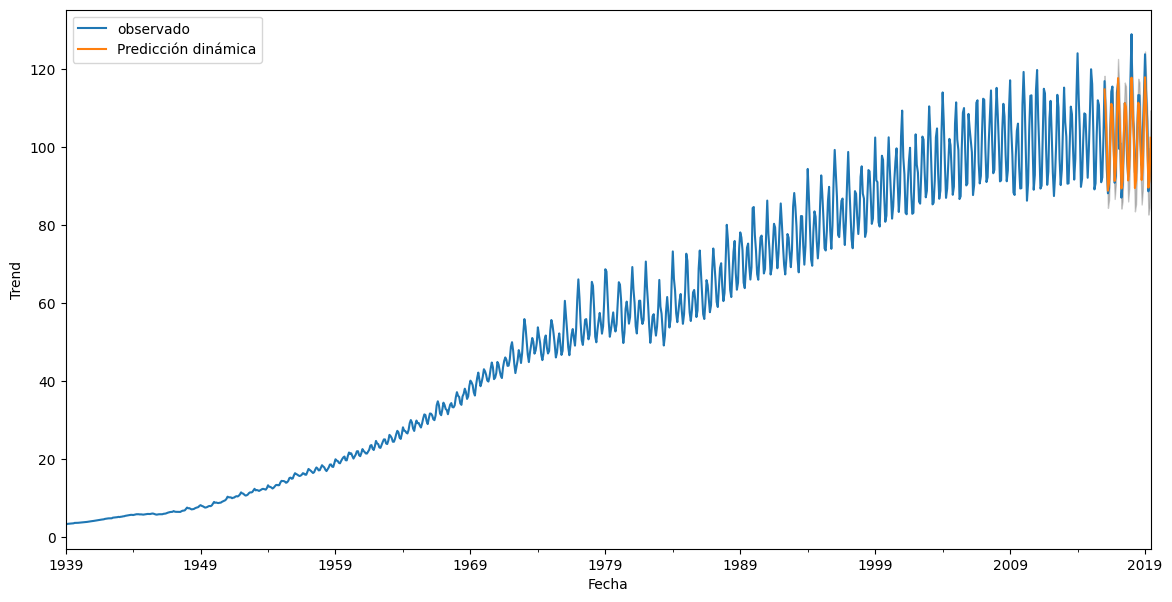

In [28]:
model = sarima_eva(production, (1, 1, 1), (0, 1, 1, 12), 52, predict_date, production_to_test)

✍ The SARIMA model is specified as `SARIMAX(1, 1, 1)x(0, 1, 1, 12)`, indicating the order of the autoregressive (`AR`) and moving average (`MA`) components, as well as the seasonal order.
In this case, the non-seasonal part of the model is `ARIMA(1, 1, 1)`, and the seasonal part is `SARIMA(0, 1, 1, 12)`.

**The model coefficients:**
* AR Coefficient (ar.L1):
The autoregressive coefficient at lag 1 is estimated to be 0.5463, indicating a positive relationship between the current observation and the observation one time step ago.
The coefficient is highly significant (p < 0.05), suggesting a strong influence of the previous observation on the current one.

* MA Coefficient (ma.L1):

The moving average coefficient at lag 1 is estimated to be -0.9409, indicating a negative relationship between the current error term and the error term one time step ago.
The coefficient is highly significant (p < 0.05), suggesting a strong influence of the previous error term on the current one.
* Seasonal MA Coefficient (ma.S.L12):

The seasonal moving average coefficient at lag 12 is estimated to be -0.6954, indicating a negative relationship between the current error term and the error term from the same season in the previous year.
The coefficient is highly significant (p < 0.05), suggesting a strong seasonal influence on the error terms.
* Variance (sigma2):

The estimated variance of the residuals (errors) from the SARIMA model is 3.1825, indicating the variability of the residuals around the model's predictions.

**Log Likelihood and Information Criteria:**

* Log Likelihood :              -1877.956
* AIC   :                        3763.913
* BIC    :                       3783.292
* HQIC   :                       3771.301

In summary, the SARIMA model captures both the autoregressive and moving average components, as well as the seasonal dependence in the production time series data. The significant coefficients indicate strong relationships between the current observations, error terms, and seasonal components, contributing to accurate forecasting of production levels.

**Comparison SARIMA vs ARIMA vs ARMA:**
The SARIMA model achieved the highest value of the `Log Likelihood` indicating that SARIMA model better explains the observed data yet it is a better fit to the data. Besides, the `SARIMA` has the lowest values of the `AIC`, `BIC`, and `HQIC` of respectively `3763.913`, `3783.292`, and `HQIC`, which are significantly lower than those of the `ARIMA` and `ARMA` (`>5700`). For that tha `SARIMA` model is of a better quality compared to the `ARIMA` and `ARMA`.

## **8. Conclusion**

We studied in this notebook the time series of industrial production (electricity and gaz) in the period 1939 to 2019. First, visualizations of the data gave us insights on the evolution over time of the production. Then the exploratory analysis through different plots we were able to see the potential trend and seasonal components of the time series. Later, with the time series decomposition, the insights from visualizations were confirmed and we extracted the positive trend and the seasonal component. Then, we tested the stationarity of the data throught the `ACF` the autocorrelation function graph and then checked our conclusion with the statistical test `ADF` Augmented Dickey-Fuller test. The production time series is not staionary due to the presence of both trend and seasonality.
For modelling the production, we used different statistical models, ARMA, ARIMA, and SARIMA. Both ARMA(1, 1) and ARIMA (1, 0, 1) have similar quality based on the metrics `AIC`, `BIC`, and `Log-Likelihhod` however the ARIMA was slighlty better. SARIMA was the optimal model show a superior quality compared to ARMA and ARIMA with considerable difference in the values of the metircs. For that, the SARIMA model with (1, 1, 1)(0, 1, 1, 12) is the best fit for the production data.